In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'axes.labelcolor':'white', 'ytick.color':'white'});

# Machine Learning Pipeline
## Collect, visualize, and split the data

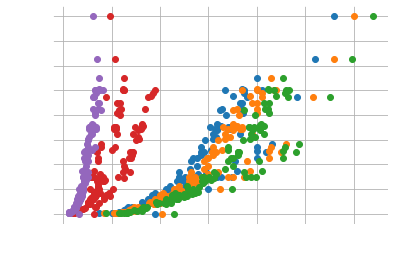

In [2]:
feature = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_feature.csv')
label = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_label.csv')
X = feature.values
y = label.values

plt.plot(X, y, 'o')
plt.xlabel('Features')
plt.ylabel('Label')
plt.grid()

## Which model and which loss to use?

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

## Data preprocessing and feature transformation

In [4]:
feature = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_feature.csv')
label = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_label.csv')
X = feature.values
y = label.values

'''
Since we are predicting the weight, it might be useful to include a column of volumn estimates.
Because weight = 9.81 * density * volume
'''
# Vol = X[:, 1:2] * X[:, 3:4] * X[:, 4:5]
# X = np.hstack((X, X ** 2))

'''
We can also use the PolynomialFeatures class provide by sklearn
'''
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
X = poly.fit_transform(X)

## Split the dataset

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Find the best hyper-parameter by checking the validation error

In [6]:
from sklearn.linear_model import Ridge

alpha_range = np.arange(1000, 0, -1)
mae_history = []
regr = Ridge()

for a in alpha_range:
    regr.set_params(alpha=a)
    regr.fit(X_train, y_train)

    yhat_val = regr.predict(X_val)
    mae = np.mean(np.abs(yhat_val - y_val))
    mae_history.append(mae)

In [7]:
best_alpha_index = np.argmin(mae_history)
best_alpha = alpha_range[best_alpha_index]

In [8]:
regr.set_params(alpha=best_alpha)
regr.fit(X_train, y_train)

yhat_val = regr.predict(X_val)
MAE_val = np.mean(np.abs(yhat_val - y_val))

print (MAE_val)

44.7871187090506


## Evaluate the model on the test set

In [9]:
''' 
The test set will be released on Sunday night
'''
X_test = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_test_feature.csv').values
y_test = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_test_label.csv').values

## Do not forget to apply the same feature transformation on the test set
poly = PolynomialFeatures(3)
X_test = poly.fit_transform(X_test)

yhat_test = regr.predict(X_test)
mae_test = np.mean(np.abs(yhat_test - y_test))

print (mae_test)

38.76824801233426


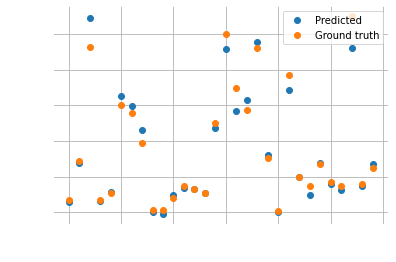

In [10]:
plt.plot(yhat_test, 'o', label='Predicted')
plt.plot(y_test, 'o', label='Ground truth')
plt.xlabel('Sample index')
plt.ylabel('Label')
plt.legend()
plt.grid()

## Bonus: Leave-one-out cross validation
The vailidation error also depends on how the validation set is chosen. It is possible that the model performs well on a specific choice of the validation set but still poorly on the test set. To alleviate this problem, we can use cross validation. Here we show an extreeme case of cross validation: leave-one-out cross validation.

It can be summarized as follows:
- Choose only one sample as the validation set, and use the rest samples for training.
- Compute the metrics (eg. MAE) for this single sample.
- Do this for every sample in the dataset.
- The validation error is the mean of the single-sample error.

In [13]:
def leave_one_out_validation(X, y, regr, a):
    N = X.shape[0] # get number of samples
    validation_error = 0
    regr.set_params(alpha=a)

    for n in range(N):
        X_val = X[n:n+1, :]
        y_val = y[n:n+1, :]
        X_train = np.delete(X, n, 0)
        y_train = np.delete(y, n, 0)

        regr.fit(X_train, y_train)
        y_hat = regr.predict(X_val)

        validation_error += np.mean(np.abs(y_hat - y_val))

    validation_error = validation_error/N
    return validation_error

In [19]:
feature = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_feature.csv')
label = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_label.csv')
X = feature.values
y = label.values
poly = PolynomialFeatures(3)
X = poly.fit_transform(X)

# loop over possible alphas
alpha_range = np.arange(1000, 0, -1)
val_error_history = []
regr = Ridge()

for a in alpha_range:
    val_error = leave_one_out_validation(X, y, regr, a)
    val_error_history.append(val_error)

In [20]:
best_alpha_index = np.argmin(val_error_history)
best_alpha = alpha_range[best_alpha_index]
regr.set_params(alpha=best_alpha)

Ridge(alpha=311, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
''' 
The test set will be released on Sunday night
'''
X_test = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_test_feature.csv').values
y_test = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_test_label.csv').values

## Do not forget to apply the same feature transformation on the test set
poly = PolynomialFeatures(3)
X_test = poly.fit_transform(X_test)

yhat_test = regr.predict(X_test)
mae_test = np.mean(np.abs(yhat_test - y_test))

print (mae_test)

38.913858313562244
